### 분석 과제 - AI/인공지능 분야 출원 특허 데이터 분석



- 기대 인사이트

    1. 수년간 기술 동향 
    
      * 시기의 국내 AI 기술 발전 추이 분석
      * 연도 별 특허 건수를 통해 특정 시점의 기술

    2.응용 분야별 및 기술 유형별 특허 분포 분석

      * 분야별 카테고리 분류 - category 파생변수 생성

    3.주요 출원인 및 기관 분석
      
      * 출원인 그룹별 카테고리 분류 - 대그룹, 소그룹으로 파생변수 생성

    4.우선권 주장번호 및 국제 출원 여부 분석

      * 국내 출원 특허의 국제적 확장 가능성과 
      * 중복 특허 여부를 평가

    5. 외국인 출원인과 국내기업/개인의 출원 건수 비교



In [1]:
import pandas as pd

df = pd.read_csv('patents_data.csv')
df.head()

,status,title,ap_num,application_date,applicant,representative,final_owner,priority_date,international_filing_date,summary
0,등록,자동화 폐기물 수거함의 딥러닝 기반 인공지능 운영 시스템 및 방법(OPERATION...,1020200078616,20200626,(주)에이씨아이케미칼아시아,고영갑,(주)에이씨아이케미칼아시아,NaN,NaN,"본 발명의 실시 예에 따른 시스템은, 자동화 폐기물 수거함의 딥러닝 기반 인공지능 ..."
1,등록,"인공지능(AI)을 통한 딥러닝훈련모듈과, 순위화프레임워크모듈을 활용하여, 법률전문가...",1020170099431,20170807,강준철,이영규,강소라,NaN,NaN,"본 발명은, 인공지능(AI)에 관한 기술과 온라인 문자열 사전에 관한 기술을 활용하..."
2,공개,인공지능을 이용한 품질검사 시스템 및 방법(System and method for ...,1020220014151,20220203,모던에이아이비전솔루션 주식회사,김정수,NaN,NaN,NaN,"본 발명은 품질검사를 위한 장치 및 방법에 관한 것으로, 본 발명에 따르면, 종래,..."
3,공개,파이썬 딥러닝 기반 인공지능(AI) 부동산 컨설팅 매물장(Python deep le...,1020210106993,20210812,조국환,NaN,NaN,NaN,NaN,본 발명은 광범위하게 활용되는 인터넷기반 부동산 정보를 때와 장소를 불문하고 기록하...
4,거절,PI 기반 빅데이터 퍼스널 컬러 진단 인공지능 딥러닝 알고리즘 시스템 운영방법(PI...,1020230034713,20230316,주식회사 오콜로르,박상열,NaN,NaN,NaN,본 발명은 PI(Personal Identity) 정보 빅데이터를 구축하는 통하여 ...


In [2]:
# 데이터 전처리 (1) = 연도 컬럼 생성
df['application_date'] = df['application_date'].astype(str)
print(df.info())
print(df['application_date'].str[:4])
df['year'] = df['application_date'].str[:4]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364212 entries, 0 to 364211
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   status                     364212 non-null  object 
 1   title                      364212 non-null  object 
 2   ap_num                     364212 non-null  int64  
 3   application_date           364212 non-null  object 
 4   applicant                  364212 non-null  object 
 5   representative             359245 non-null  object 
 6   final_owner                196016 non-null  object 
 7   priority_date              147903 non-null  float64
 8   international_filing_date  101183 non-null  float64
 9   summary                    364206 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 27.8+ MB
None
0         2020
1         2017
2         2022
3         2021
4         2023
          ... 
364207    2013
364208    2013
364209    2013
36

,status,title,ap_num,application_date,applicant,representative,final_owner,priority_date,international_filing_date,summary,year
0,등록,자동화 폐기물 수거함의 딥러닝 기반 인공지능 운영 시스템 및 방법(OPERATION...,1020200078616,20200626,(주)에이씨아이케미칼아시아,고영갑,(주)에이씨아이케미칼아시아,NaN,NaN,"본 발명의 실시 예에 따른 시스템은, 자동화 폐기물 수거함의 딥러닝 기반 인공지능 ...",2020
1,등록,"인공지능(AI)을 통한 딥러닝훈련모듈과, 순위화프레임워크모듈을 활용하여, 법률전문가...",1020170099431,20170807,강준철,이영규,강소라,NaN,NaN,"본 발명은, 인공지능(AI)에 관한 기술과 온라인 문자열 사전에 관한 기술을 활용하...",2017
2,공개,인공지능을 이용한 품질검사 시스템 및 방법(System and method for ...,1020220014151,20220203,모던에이아이비전솔루션 주식회사,김정수,NaN,NaN,NaN,"본 발명은 품질검사를 위한 장치 및 방법에 관한 것으로, 본 발명에 따르면, 종래,...",2022
3,공개,파이썬 딥러닝 기반 인공지능(AI) 부동산 컨설팅 매물장(Python deep le...,1020210106993,20210812,조국환,NaN,NaN,NaN,NaN,본 발명은 광범위하게 활용되는 인터넷기반 부동산 정보를 때와 장소를 불문하고 기록하...,2021
4,거절,PI 기반 빅데이터 퍼스널 컬러 진단 인공지능 딥러닝 알고리즘 시스템 운영방법(PI...,1020230034713,20230316,주식회사 오콜로르,박상열,NaN,NaN,NaN,본 발명은 PI(Personal Identity) 정보 빅데이터를 구축하는 통하여 ...,2023


In [3]:
# 데이터 전처리 (2) - 출원 그룹별 컬럼 생성

# applicant 컬럼의 값 전처리 (공백 제거, 소문자 변환)
df['applicant_processed'] = df['applicant'].str.replace(' ', '').str.lower()

# 소그룹 및 대그룹 정의
소그룹_매핑 = {
    '현대': ['현대', 'hyn', '에이치디'],
    '기아': ['기아', 'kia'],
    '삼성': ['삼성', 'samsung'],
    '엘지': ['엘지', 'lg'],
    '한화': ['한화', 'hanhwa'],
    '엘에스': ['엘에스', 'ls'],
    '서울바이오시스': ['서울바이오시스'],
    '린나이코리아': ['린나이코리아'],
    '한국생산기술연구소': ['한국생산기술연구원', 'kitech', '한국과학기술연구원', 'kist', '한국기계연구원', 'kimm',
                   '한국에너지기술연구원', 'kier', '한국건설기술연구원', 'kict', '한국해양과학기술원', 'kiost',
                   '한국전자통신 연구원', 'etri', '한국세라믹기술원', 'kicet', '한국지질 자원 연구원', 'kigam'],
}

대그룹_매핑 = {
    '국내대기업': ['현대', '기아', '삼성', '엘지', '한화', '엘에스', '서울바이오시스', '린나이코리아'],
    '국내연구소': ['한국생산기술연구소', 'kitech', '한국과학기술연구소', 'kist', '한국기계연구원', 'kimm',
               '한국에너지기술연구원', 'kier', '한국건설기술연구원', 'kict', '한국해양과학기술원', 'kiost',
               '한국전자통신 연구원', 'etri', '한국세라믹기술원', 'kicet', '한국지질 자원 연구원', 'kigam'],
    '국내대학': ['가톨릭대학교', '서울대학교', '고려대학교', '연세대학교', '한국과학기술원', '포항공과대학교', '한양대학교', 
             '성균관대학교', '경희대학교'],
    '해외출원인': ['타이완세미컨덕터', '캐논', '애플', '화웨이', '인텔', '어플라이드머티어리얼스', '도요타', '한도오따이에네루기',
              '고베세이코쇼', '도쿄엘렉트론', '퀄컴', '마이크론', '도레이', '후지', '도시바']
}



def categorize_topic(x):
    for topic, keywords in 소그룹_매핑.items():
        if any(kw in x for kw in keywords):
            return topic
    return '기타'  # 주제에 맞는 키워드가 없는 경우

def categorize_topic1(x):
    for topic, keywords in 대그룹_매핑.items():
        if any(kw in x for kw in keywords):
            return topic
    return '기타'  # 주제에 맞는 키워드가 없는 경우



# applicant_processed 컬럼을 이용하여 소그룹 및 대그룹 할당
df['applicant_sgrp'] = df['applicant_processed'].apply(lambda x: categorize_topic(x))
df['applicant_lgrp'] = df['applicant_processed'].apply(lambda x: categorize_topic1(x))

# # applicant_processed 컬럼을 이용하여 소그룹 및 대그룹 할당
# df['applicant_sgrp'] = df['applicant_processed'].apply(
#     lambda x: next((key for key, value in 소그룹_매핑.items() if x in value), 'ETC')
# )
# df['applicant_lgrp'] = df['applicant_processed'].apply(
#     lambda x: next((key for key, value in 대그룹_매핑.items() if x in value), 'ETC')
# )

print(df[['applicant', 'applicant_sgrp', 'applicant_lgrp']])


                           applicant applicant_sgrp applicant_lgrp
0                     (주)에이씨아이케미칼아시아             기타             기타
1                                강준철             기타             기타
2                   모던에이아이비전솔루션 주식회사             기타             기타
3                                조국환             기타             기타
4                          주식회사 오콜로르             기타             기타
...                              ...            ...            ...
364207                    브로드콤 코포레이션             기타             기타
364208                     현대자동차주식회사             현대          국내대기업
364209                      인텔 코포레이션             기타          해외출원인
364210  프래트 앤 휘트니 라인 메인터넌스 서비시즈, 인크.             기타             기타
364211      타이완 세미콘덕터 매뉴팩쳐링 컴퍼니 리미티드             기타             기타

[364212 rows x 3 columns]


In [4]:
# 데이터 전처리 (3) - 출원 특허가 진행 중인지 등록되었는지 여부를 나타내는 컬럼 생성

# 새로운 컬럼 ongoing 추가 (출원 특허가 계속 중 혹은 등록 되었는지 여부)
# 무효, 취하, 취소, 포기, 소멸, 거절

invalid_words = ['무효', '거절', '취소', '취하' '포기', '소멸']

# status 컬럼의 각 행을 순회하면서 invalid_words에 포함된 단어가 있는지 여부를 판단하여 onGoing 컬럼을 생성
df['ongoing'] = df['status'].apply(lambda x: 0 if any(word in x for word in invalid_words) else 1)

In [6]:
# 데이터 전처리 (4) - 분야별 컬럼 생성

import re

categories = {
    '제너럴': r'\b(추론|알고리즘|학습|훈련방법|지도방법|학습방법|머신러닝|패턴인식)\b',
    '의료': r'\b(의료|헬스|치료|건강|유전자|병원|환자|의료기기|의료정보|바이오의료)\b',
    '전자상거래서비스': r'\b(상거래|상품|배송|판매|결제|공급망|판매망|서비스|전자상거래플랫폼|온라인쇼핑|디지털결제)\b',
    '자동차': r'\b(자동차|주행|자율주행|도로|차량|교통|보행자|차선|신호등)\b',
    '금융': r'\b(금융|코인|트레이딩|투자|신용|금융사기|자산|블록체인|디지털자산)\b',
    '교육': r'\b(교육|강의|교육용|시험|성적|학생|학습관리)\b',
    '농업': r'\b(농업|스마트농업|농작물|작물|농약|수확|스마트팜)\b',
    '엔터테인먼트': r'\b(콘텐츠생성|게임|미디어|사용자인터페이스|가상현실|음성인식|가상현실콘텐츠|엔터테인먼트)\b',
    '보안': r'\b(보안|침입|탐지|데이터보호|위협예측|인증시스템|보안|암호화|안전기술)\b',
    '자동화시스템': r'\b(자동화|로봇자동화|제어시스템|IoT|위협예측|인증시스템|보안|암호화|안전기술|로봇제어|스마트시스템)\b'
}


def check_keywords(text, pattern):
    # 문자열의 공백 제거
    text = text.replace(" ", "")
    return 1 if re.search(pattern, text, flags=re.IGNORECASE) else 0


# 결측치 처리 후 각 카테고리에 대해 title이나 summary에서 키워드를 찾아서 하나의 컬럼에 표시
for category, pattern in categories.items():
    df[category] = df.apply(lambda row: check_keywords((row['title'] if isinstance(row['title'], str) else '') or (row['summary'] if isinstance(row['summary'], str) else ''), pattern), axis=1)



In [7]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\2538667604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year',color='orange',order=category_order,palette= sns.color_palette("Set3"))


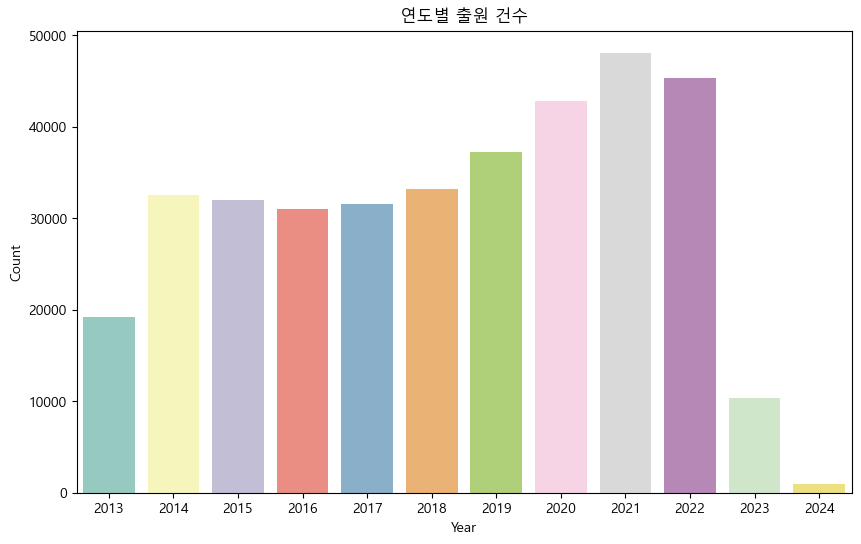

In [8]:
# insight 1 : 연도별 특허 출원 건수
import matplotlib.pyplot as plt
import seaborn as sns

category_order = sorted(df['year'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year',color='orange',order=category_order,palette= sns.color_palette("Set3"))


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('연도별 출원 건수')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\1750255380.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[category] != 0] , x='year',ax = axes[row,col],palette=sns.color_palette("Set3"),order=category_order)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\1750255380.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(),rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\1750255380.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[category] != 0] , x='year',ax = axes[row,col]

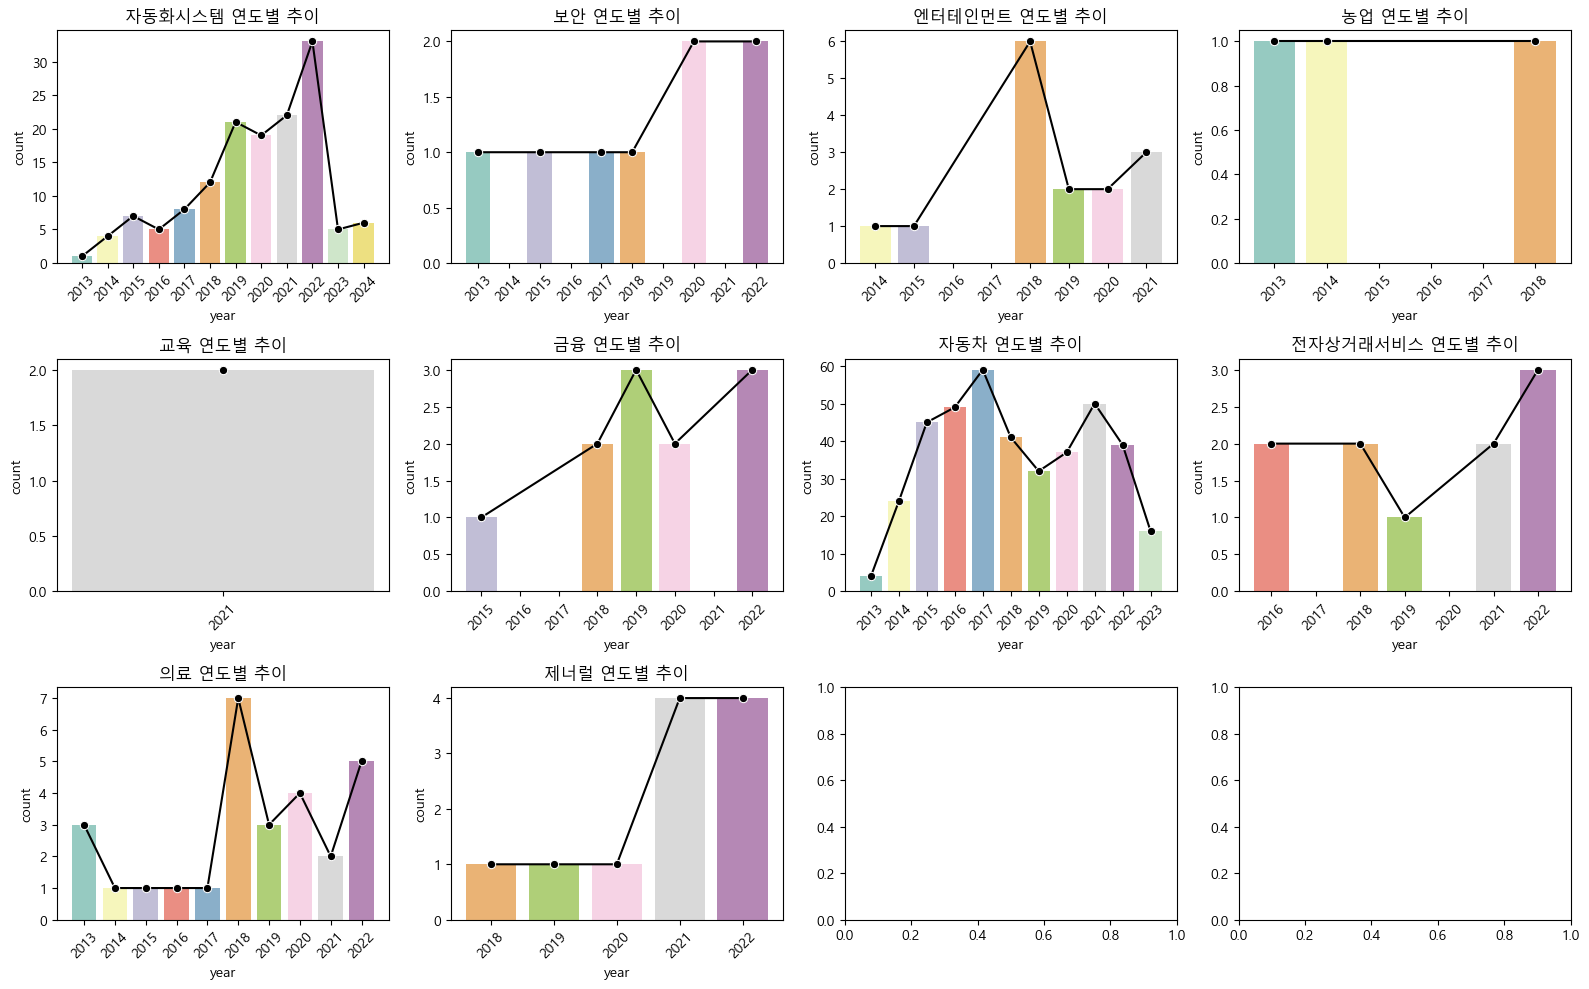

In [12]:
# insight 1: 각 기술 카테고리별 해마다 출원 건수 변화 추이

import matplotlib.pyplot as plt
import seaborn as sns

category_order = sorted(df['year'].unique())
df_category = df.columns[-1:-11:-1]
fig, axes = plt.subplots(3,4,figsize=(16,10))
for i, category in enumerate(df_category):
    row = i // 4
    col = i % 4
    sns.countplot(data=df[df[category] != 0] , x='year',ax = axes[row,col],palette=sns.color_palette("Set3"),order=category_order)
    axes[row,col].set_title(f"{category} 연도별 추이")
    axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(),rotation=45)
    count_data = df[df[category] != 0].groupby('year').size().reset_index(name='count')
    sns.lineplot(data=count_data, x='year',y ='count', ax=axes[row, col], color='black',marker='o')
plt.tight_layout()
plt.show()


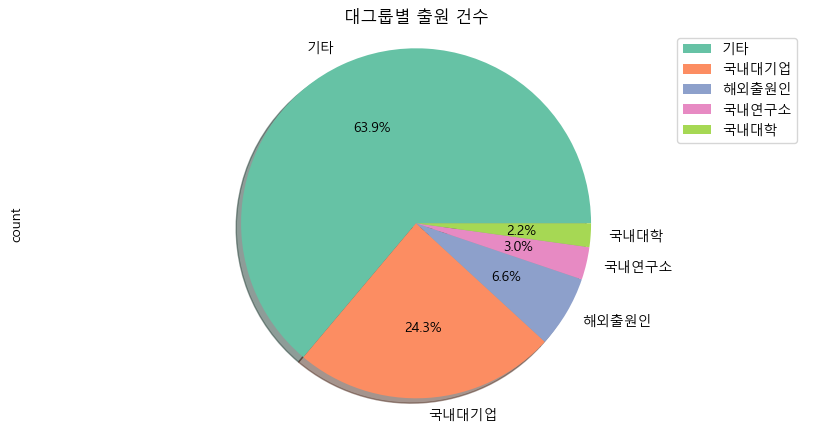

In [15]:
# insight 3. 출원인 그룹별 pie-chart
# 대그룹별 출원건수
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['applicant_lgrp'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors = sns.color_palette('Set2'),shadow=True)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize='medium')
plt.title('대그룹별 출원 건수')
plt.axis('equal')
plt.show()

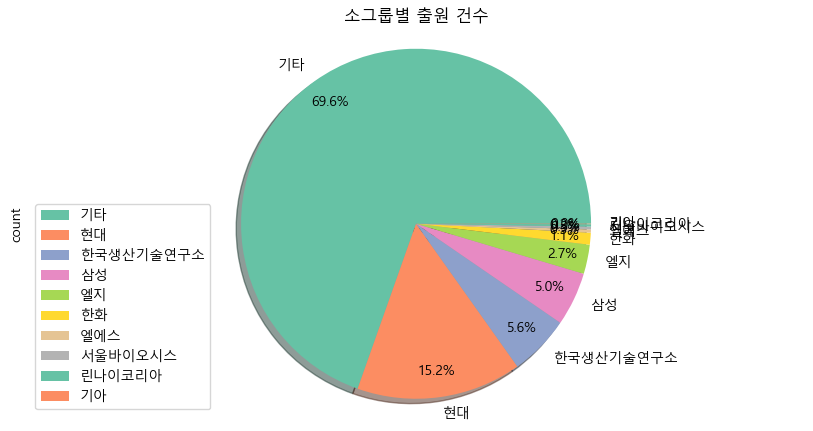

In [16]:
# 소그룹별 출원 건수
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['applicant_sgrp'].value_counts().plot(kind='pie',autopct='%1.1f%%',pctdistance=0.85, colors=sns.color_palette('Set2'),shadow=True)
plt.xticks(rotation=45)
plt.legend(loc='lower left', fontsize='medium')
plt.title('소그룹별 출원 건수')
plt.axis('equal')
plt.show()

In [32]:
df[df_category]

,자동화시스템,보안,엔터테인먼트,농업,교육,금융,자동차,전자상거래서비스,의료,제너럴
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
364207,0,0,0,0,0,0,0,0,0,0
364208,0,0,0,0,0,0,0,0,0,0
364209,0,0,0,0,0,0,0,0,0,0
364210,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 출원인별 카테고리


df_category

for i, category in enumerate(df_category):

    sns.countplot(data = df, x = 'applicant_lgrp',y='category')
plt.show()

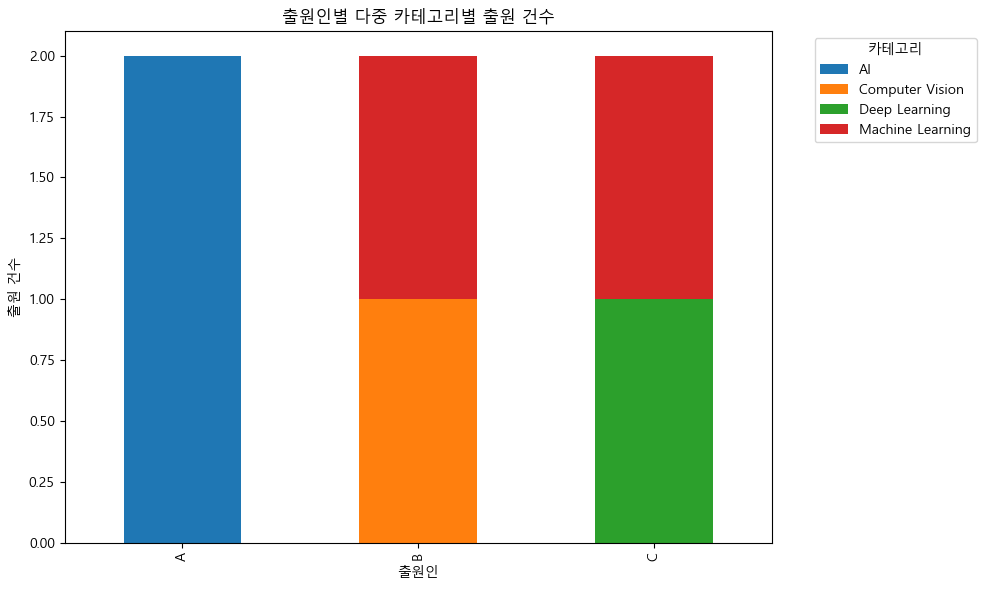

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성 (출원인과 카테고리 데이터)
data1 = {
    '출원인': ['A', 'B', 'C', 'A', 'B', 'C'],
    '카테고리1': ['AI', 'Machine Learning', 'Deep Learning', 'AI', 'Computer Vision', 'Machine Learning'],
    '카테고리2': ['Machine Learning', 'Deep Learning', 'AI', 'Computer Vision', 'AI', 'Computer Vision'],
    '카테고리3': ['Deep Learning', 'Computer Vision', 'AI', 'Machine Learning', 'Deep Learning', 'AI']
}

data = pd.DataFrame(data1)

# 모든 카테고리 컬럼을 하나의 카테고리 컬럼으로 통합
categories = pd.concat([data['카테고리1'], data['카테고리2'], data['카테고리3']], ignore_index=True)

# 출원인과 통합된 카테고리 데이터프레임 생성
new_df = pd.concat([data[['출원인']].copy().reset_index(drop=True), categories.rename('카테고리')], axis=1)

# 출원인별 카테고리별 출원 건수 계산
counts = new_df.groupby(['출원인', '카테고리']).size().unstack(fill_value=0)

# 막대 그래프 그리기
counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('출원인별 다중 카테고리별 출원 건수')
plt.xlabel('출원인')
plt.ylabel('출원 건수')
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
# isight 4. 해외 출원 기관의 개수
print(len(df[df.international_filing_date.notna()]))

101183


In [20]:
print(len(df[df.international_filing_date != 0]))

8


In [18]:
df.international_filing_date = df.international_filing_date.fillna(0)

In [19]:
df['international_application'] = df['international_filing_date'].apply(lambda x: '국내출원' if x == 0 else '국내+해외출원')

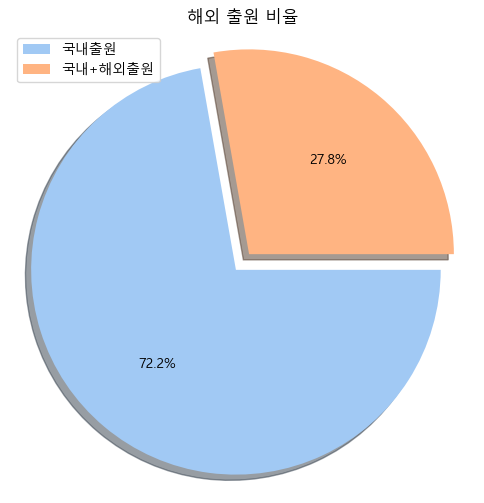

In [20]:
# 국내 출원 건수에서 차지 하는 비율
import matplotlib.pyplot as plt
import seaborn as sns
explode=[0,0.1]
plt.figure(figsize=(6,6))
plt.pie(df.international_application.value_counts(),autopct='%.1f%%', startangle=0, explode=explode, shadow=True, counterclock=False, colors=sns.color_palette('pastel'))
plt.title("해외 출원 비율")
plt.legend(df.international_application.value_counts().index)
plt.axis('equal')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\1861078477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = applicant_year, x='year',order=category_order,palette= sns.color_palette("Set3"))


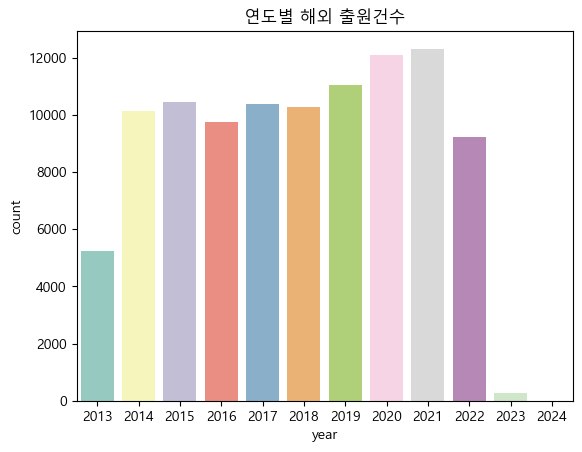

In [21]:
# 출원 건수의 년도 별 변화

category_order = sorted(df['year'].unique())

applicant_year = df[df.international_filing_date != 0]
sns.countplot(data = applicant_year, x='year',order=category_order,palette= sns.color_palette("Set3"))
plt.title('연도별 해외 출원건수')
plt.show()

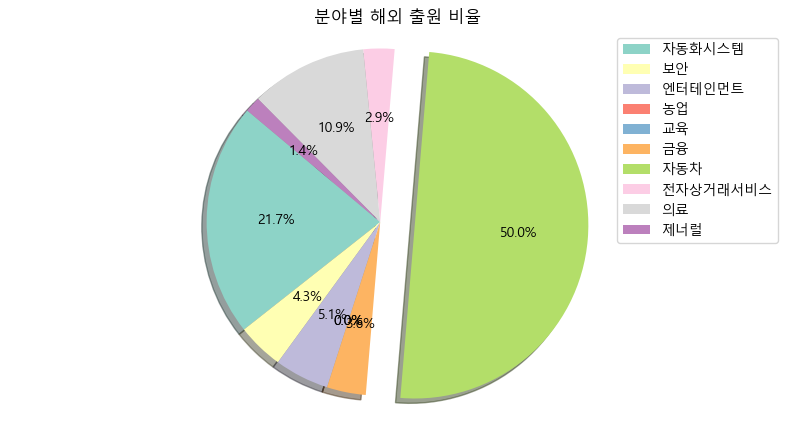

In [22]:
# 카테고리별 해외 출원
explode = [0,0,0,0,0,0,0.2,0,0,0]
counts = applicant_year[df_category].sum()
plt.figure(figsize=(10,5))
plt.pie(counts,autopct='%1.1f%%',colors=sns.color_palette('Set3'),explode=explode,shadow=True,startangle=140)
plt.legend(applicant_year[df_category].columns)
plt.title('분야별 해외 출원 비율')
plt.axis('equal')
plt.show()


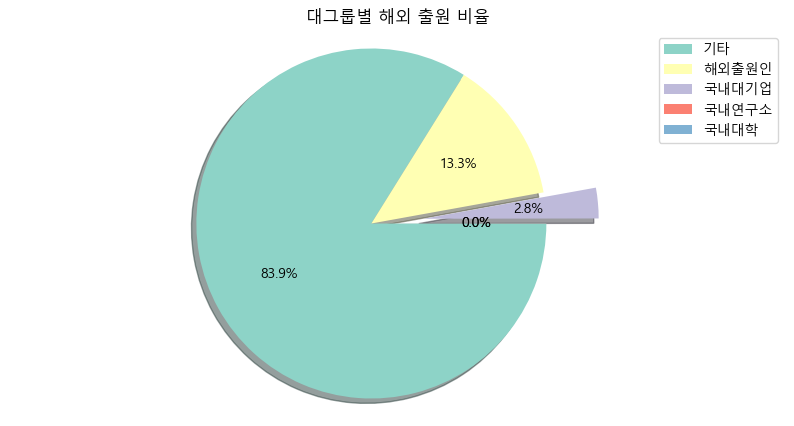

In [23]:
# 그룹별 해외 출원
explode=[0,0,0.3,0,0]
plt.figure(figsize=(10,5))
plt.pie(applicant_year.applicant_lgrp.value_counts(),autopct='%1.1f%%', colors=sns.color_palette('Set3'),startangle=0,explode=explode,counterclock=False,shadow=True)
plt.legend(applicant_year.applicant_lgrp.value_counts().index)
plt.title('대그룹별 해외 출원 비율')
plt.axis('equal')
plt.show()

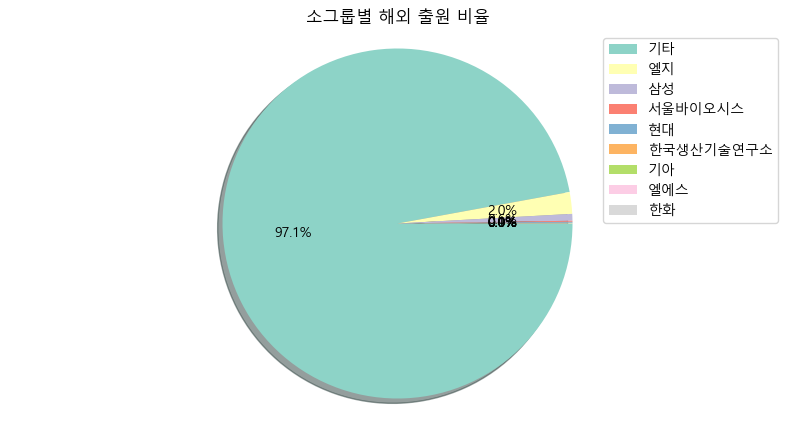

In [24]:
# explode=[0,0,0.3,0,0]
plt.figure(figsize=(10,5))
plt.pie(applicant_year.applicant_sgrp.value_counts(),autopct='%1.1f%%', colors=sns.color_palette('Set3'),startangle=0,counterclock=False,shadow=True)
plt.legend(applicant_year.applicant_sgrp.value_counts().index)
plt.title('소그룹별 해외 출원 비율')
plt.axis('equal')
plt.show()

In [25]:
#  국내 특허 (국내 출원인 특허로 한정) 들이 해외 출원 하는지 여부

# 중복 특허 확인
duplicate_patents = df[df['priority_date'].notnull()]
num_duplicate_patents = len(duplicate_patents)

# 국제 출원 특허 확인
international_patents = df[df['international_filing_date'].notnull()]
num_international_patents = len(international_patents)

# 결과 출력
print(f"중복 특허 개수: {num_duplicate_patents}")
print(f"국제 출원 특허 개수: {num_international_patents}")

중복 특허 개수: 147903
국제 출원 특허 개수: 364212


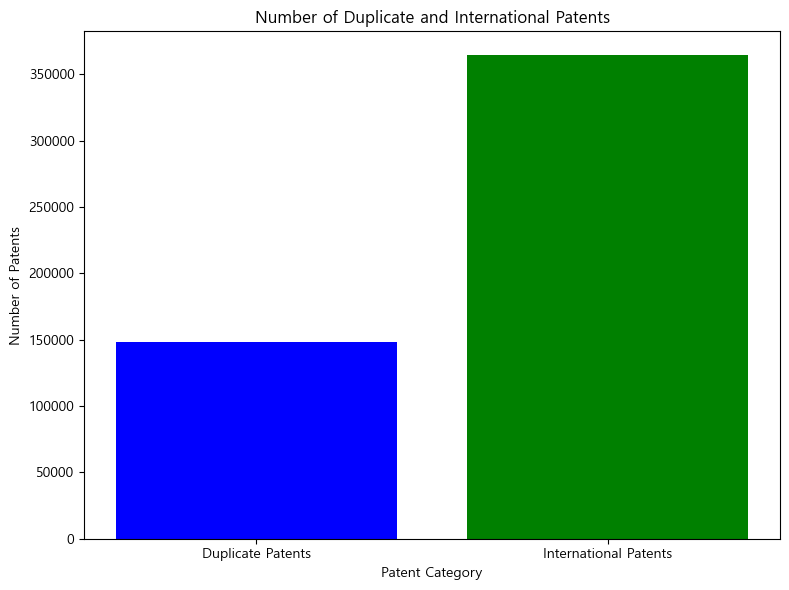

In [26]:
# 중복 특허 및 국제 출원 특허 건수 파악
# 특허 개수 시각화
categories = ['Duplicate Patents', 'International Patents']
counts = [num_duplicate_patents, num_international_patents]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Patent Category')
plt.ylabel('Number of Patents')
plt.title('Number of Duplicate and International Patents')
plt.tight_layout()
plt.show()

ongoing
1    310515
0     53697
Name: count, dtype: int64


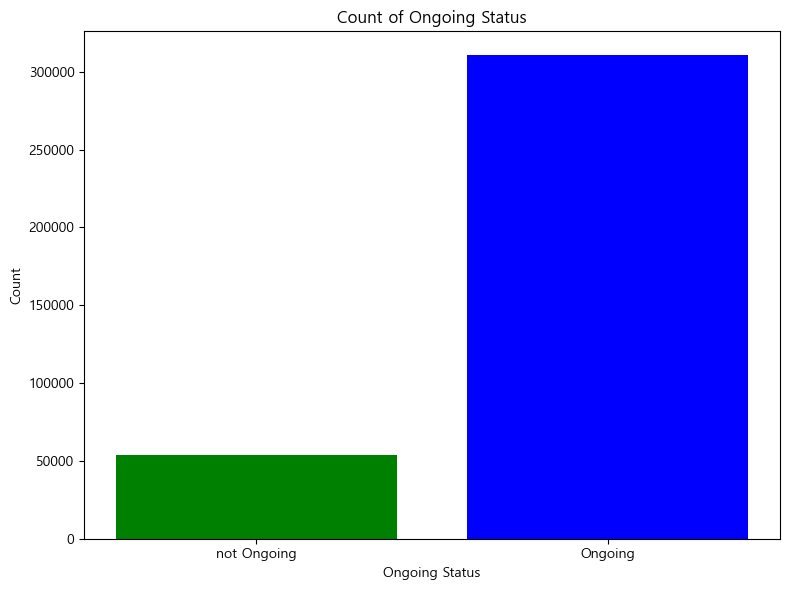

In [27]:
# 특허 출원 개수 대비 거절 건수 비교

# onGoing 컬럼 카운트
ongoing_counts = df['ongoing'].value_counts()

# 결과 출력
print(ongoing_counts)

# onGoing 컬럼 시각화
categories = ongoing_counts.index
counts = ongoing_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Ongoing Status')
plt.ylabel('Count')
plt.title('Count of Ongoing Status')
plt.xticks(categories, ['Ongoing', 'not Ongoing'])
plt.tight_layout()
plt.show()

Applicant Type
Domestic    355742
Foreign       8470
Name: count, dtype: int64


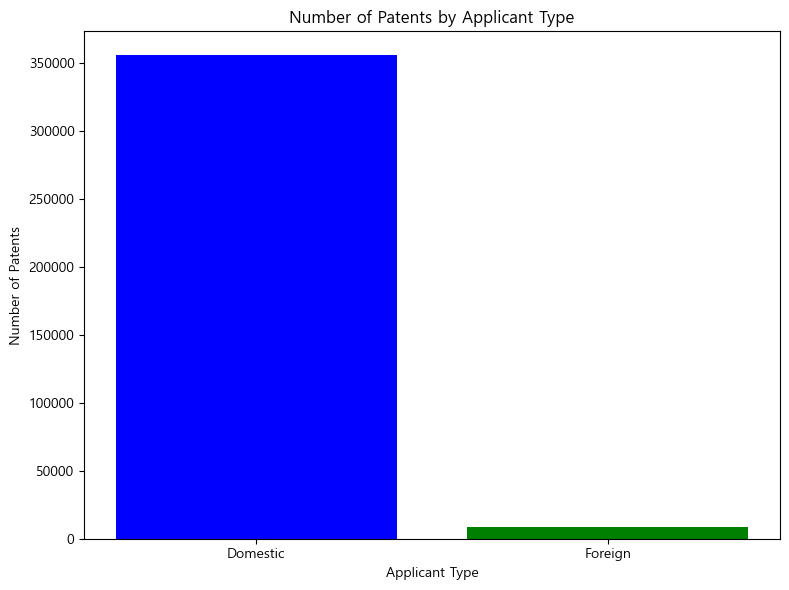

In [28]:
# 국내/외국인 출원 건수 비교
# 외국인 분류 키워드
foreign_keywords = [
    '애플', '도요타', '타이완세미컨덕터', '화웨이', '인텔', 'TSMC'
]

# 출원인을 분류할 함수
def classify_applicant(applicant):
    if any(keyword.lower() in applicant.lower() for keyword in foreign_keywords):
        return 'Foreign'
    else:
        return 'Domestic'

# 각 출원인을 분류하여 새로운 열에 저장
df['Applicant Type'] = df['applicant'].apply(classify_applicant)

# 각 분류별 개수 계산
applicant_type_counts = df['Applicant Type'].value_counts()

# 결과 출력
print(applicant_type_counts)

# 분류별 개수를 막대 그래프로 시각화
categories = applicant_type_counts.index
counts = applicant_type_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Applicant Type')
plt.ylabel('Number of Patents')
plt.title('Number of Patents by Applicant Type')
plt.tight_layout()
plt.show()

In [ ]:
# f. 출원 특허 중에 출원인에서 새로운 양도인으로 양도된 경우 건수 변화

# mismatch 여부를 확인할 함수
def check_mismatch(row):
    if pd.isna(row['final_owner']):
        return 'not mismatch'
    elif row['applicant'].strip().lower() == row['final_owner'].strip().lower():
        return 'not mismatch'
    else:
        return 'mismatch'

# mismatch 여부를 확인하여 새로운 열에 저장
df['mismatch'] = df.apply(check_mismatch, axis=1)

# 각 분류별 개수 계산
mismatch_counts = df['mismatch'].value_counts()

# 결과 출력
print(mismatch_counts)

# 분류별 개수를 막대 그래프로 시각화
categories = mismatch_counts.index
counts = mismatch_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Mismatch Status')
plt.ylabel('Number of Patents')
plt.title('Number of Mismatches between Applicant and Final Owner')
plt.tight_layout()
plt.show()